In [2]:
# open file list_attr_celeba.txt and read the content in a list

import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img_path = "data/img_align_celeba"
df = pd.read_csv("data/list_attr_celeba.csv")
# print(df.head())
print(df.columns)
with_beard_indices = df['image_id'][(df['No_Beard'] == -1) & (df['Male'] == 1)].tolist()
without_beard_indices = df['image_id'][(df['No_Beard'] == 1) & (df['Male'] == 1)].tolist()
print(len(with_beard_indices))
print(len(without_beard_indices))

print(with_beard_indices[:5])




Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')
33302
51132
['000016.jpg', '000020.jpg', '000025.jpg', '000037.jpg', '000041.jpg']


In [2]:
# load ids for images
img_id_map = dict()
images_for_id = dict()
with open("data/identity_CelebA.txt", "r") as file:
    file_list = file.readlines()
    for line in file_list:
        img = line.split()[0]
        id = line.split()[1]
        img_id_map[img] = id
        if id not in images_for_id:
            images_for_id[id] = []
        images_for_id[id].append(img)


print("Distinct ids:", len(set(img_id_map.values())))

cnt = 0
set1 = set(img_id_map[i] for i in with_beard_indices)
set2 = set(img_id_map[i] for i in without_beard_indices)
print(len(set1))
print(len(set2))

with_and_without_beard_ids = list(set1.intersection(set2))
print("Number of same people with and without beard:", len(with_and_without_beard_ids))


Distinct ids: 10177
3236
4644
Number of same people with and without beard: 2848


In [45]:
rand_ids = np.random.choice(with_and_without_beard_ids, 5)
f = plt.figure()
plt.axis('off')
f.set_figheight(100)
f.set_figwidth(100)
for i in range(5):
    id = rand_ids[i]
    with_beard_img = np.random.choice(images_for_id[id])
    without_beard_img = np.random.choice(images_for_id[id])
    while with_beard_img not in with_beard_indices:
        with_beard_img = np.random.choice(images_for_id[id])
    while without_beard_img not in without_beard_indices:
        without_beard_img = np.random.choice(images_for_id[id])
    
    with_beard_img = Image.open(os.path.join("img_align_celeba", with_beard_img))
    without_beard_img = Image.open(os.path.join("img_align_celeba", without_beard_img))
    f.add_subplot(5, 2, 2*i + 1)
    plt.imshow(with_beard_img)
    f.add_subplot(5, 2, 2*i + 2)
    plt.imshow(without_beard_img)
    print("")

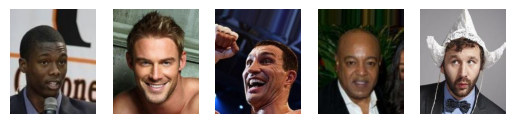

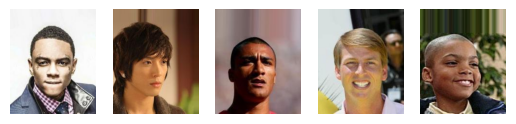

In [3]:
beard_images = [Image.open(f'{img_path}/{with_beard_indices[np.random.randint(0, len(with_beard_indices))]}') for i in range(5)]
f = plt.figure()
for i in range(5):
    # Debug, plot figure
    f.add_subplot(1, 5, i + 1)
    plt.axis('off')
    plt.imshow(beard_images[i])

plt.show(block=True) 

no_beard_images = [Image.open(f'{img_path}/{without_beard_indices[np.random.randint(0, len(without_beard_indices))]}') for i in range(5)]
f = plt.figure()
for i in range(5):
    # Debug, plot figure
    f.add_subplot(1, 5, i + 1)
    plt.axis('off')
    plt.imshow(no_beard_images[i])

plt.show(block=True) 
